<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/Integrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for Table of Contents use:
#
# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --sys-prefix
# jupyter nbextension enable scratchpad/main --sys-prefix
#
%%capture
!pip install jupyterthemes
!pip install line_profiler
!pip install psutil
!pip install memory_profiler
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
from jupyterthemes import jtplot


jtplot.style(theme='gruvboxd')

# Integrace Funkce
Integrace funkce patří mezi nejčastější problémy, se kterými se můžete setkat v praxi. Na rozdíl od učebnic, ve vetšině případů jsou funkce analyticky neintegrovatelné a jejich integrál je tak nutné hledat numerickou cestou. 

Celá podstata problému numerické integrace spočívá v obecně v aproximaci integrace funkce sumací jejich reprezentativních funkčních hodnot

$$
\int_a^b f(x){\rm d}x \approx \sum_{i=0}^{n-1}c_i f(x_i)
$$

Velkou skupinu tvoří integrační metody, které využívají k numerickému výpočtu interpolační funkci v podobě polynomu. Vzhledem k vlastnostem polynomu, především oscilaci polynomu vyšších řádu při interpolaci mezi body, jsou praxi využívány polynomy nižších řádu.

## Obdelníková metoda

První metoda, kterí nás zcela jistě napadne, vychází z *Riemannovy* definice určitého integrálu. Integrál je nahrazen sumou ve tvaru

\begin{equation}
\sum_i^N f(x_i^*)(x_i-x_{i-1})\,, x_i^* \in [x_{i-1},x_i]
\end{equation}
Výběr bodu je libovolný, v naší metodě použijeme střed intervalu
\begin{equation}
\int_a^b f(x){\rm d}x = {\Delta x}\sum_{k=1}^N f\left(\frac{x_{k-1}+x_k}{2}\right) 
\end{equation}

Když se zamyslíme, zjistíme že podstata metody je jednoduchá, nahrazujeme průběh funkce na daném intervalu konstantní funkcí, tedy polynomem nultého stupně.

Text(0.5, 1.0, 'Obdelníková metoda, N = 10')

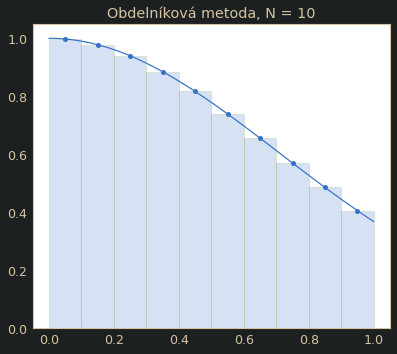

In [ ]:
a = 0    # left interval
b = 1    # right interval
N = 10  # number of points

# Definition of function
def fce(x):
  return np.exp(-x**2)

# Points for rectangle calculation
x = np.linspace(a,b,N+1)

# Points of graph
x_plot = np.linspace(a,b,10*N+1)
y_plot = fce(x_plot)

plt.plot(x_plot,y_plot,'b')
ax = plt.gca()
ax.set_facecolor("w")
ax.grid(False)
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = fce(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10,color='b')
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='g', linewidth=1.0)
plt.title('Obdelníková metoda, N = {}'.format(N))

### Algoritmus metody
---
* Stanovíme počet bodů $N+1$ na daném intervalu $(a,b)$.
* Body $x_0,\dots,x_{N+1}$ nám dělí interval na $N$ podintervalů.
* V každém intervalu určíme střed $\frac{x_{i-1}+x_{i}}{2}$ a v něm vyčíslíme integrovanou funkci.
* Určíme odhad integralu podle vzorce $\frac{b-a}{N}\left(
  \sum_{i=1}^{N} f(\frac{x_{i-1}+x_i}{2})\right)$
---
### Úkol:
S pomocí výše zmíněné metody integrujte funkci $e^{-x^2}$ na intervalu (0,1). Výsledek porovnejte s analytickým výrazem.


In [ ]:
N = 1000

# Function calculate integral using Riemann midpoint method
def midpointInt(fce,a,b,n):
  x = np.linspace(a,b,n+1)
  sum_parentheses = (b-a)/((n))*(np.sum(fce((x[:-1]+x[1:])*0.5)))
  return sum_parentheses

midpointInt(fce,a,b,N)




%timeit midpointInt(fce,a,b,N)

%reload_ext line_profiler
%lprun -f midpointInt midpointInt(fce,a,b,N)

10000 loops, best of 5: 63.4 µs per loop


## Lichoběžníková metoda
<img src='https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/trapez.png?raw=1' align='right'></img>
Metoda spočívá v aproximaci určitého integrálu součtem obsahu lichoběžníků,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{\Delta x}{2}\sum_{k=1}^N (f(x_{k+1})+f(x_k)) = \frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right),
\end{equation}

které tvoří na daném intervalu $(a,b)$ sada $N$ ekvidistantních bodů.

### Algoritmus

* Stanovíme počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right)$

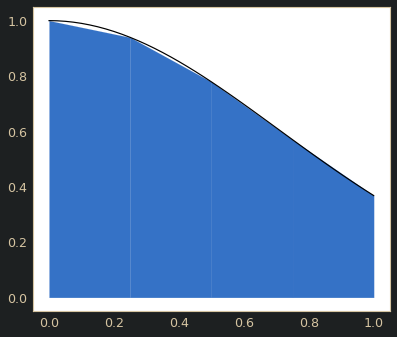

In [ ]:
a = 0    # left interval
b = 1    # right interval
N = 4 # number of points

# Definition of function
def fce(x):
  return np.exp(-x**2)

# Points for rectangle calculation
x = np.linspace(a,b,N+1)

# Points of graph
x_plot = np.linspace(a,b,10*N+1)
y_plot = fce(x_plot)

plt.plot(x_plot,y_plot,'black')
ax = plt.gca()
ax.set_facecolor('w')
ax.grid(False)
for i in range(N):
  plt.fill_between([x[i],x[i+1]],[fce(x[i]),fce(x[i+1])],color='b',linewidth=0.1,edgecolor='black')


In [ ]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

### Úkoly:

*   Opakujte integraci funkce $e^{-x^2}$ na intervalu (0,1)
*   Porovnejte rychlost konvergence s předchozí metodou



## Simpsonova metoda
 
 Metoda spočívá v aproximaci určitého integrálu součtem obsahu parabol,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{\Delta x}{3}\left(f(x_0)+\sum_{j=1}^{n/2-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_n)\right)
\end{equation}

kde $x_j = a + jh$, $x_0=a$ a $x_n=b$.

### Algoritmus
Oprava koeficientu
* Předem určíme **sudý** počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{3N}\left(f(x_0)+f(x_2)+4f(x_3)+f(x_4)+4f(x_5)\dots 4f(x_{N-1})+f(x_N)+f(x_{N+1})\right)$  

---
### Nástin odvození vzorce

Nastíním jednodouché odvození vztahu integrace Simpsonovou metodou. Pro zjednodušení výpočtů umístíme startovní bod do bodu $(0,y_1)$

Naším úkolem bude určit obsah plochy pod parabolou 
$$ 
y = ax^2+bx+c 
$$

mezi body $ x_0 = -h$ a $x_3 =h$. Dle zadání parabola prochází body $(x_0,y_0),(x_1,y_1),(x_2,y_2)$ přičemž vzdálenosti mezi body $x_1-x_0 = x_2-x_1 =\Delta x$


Pro obsach plochy platí,

\begin{equation}
A = \int_{-h}^{h}(ax^2+bx+c){\rm d}x = \left[\frac{ax^3}{3}+\frac{bx^2}{2}+cx\right]_{-h}^{h}
\end{equation}

\begin{equation}
A = \left(\frac{ah^3}{3}+\frac{bh^2}{2}+ch\right)-\left(-\frac{ah^3}{3}+\frac{bh^2}{2}-ch\right) = \frac{2ah^3}{3}+2ch = \frac{h}{3}\left(2ah^2+6c\right)
\end{equation}

Výraz dále upravíme a to použitím průchozích bodů, které dosadíme do obecné rovnice paraboly. 

\begin{eqnarray}
y_0 &=& ah^2-bh +c \\
y_1 &=& c \\
y_2 &=& ah^2+bh+c
\end{eqnarray}

Z těchto rovnic můžeme vyjádřit 

\begin{eqnarray}
c &=& y_1 \\
2ah^2 &=& y_0 - 2y_1 + y_2
\end{eqnarray}

To nám umožńuje upravit vzorec 

\begin{equation}
A_1 = \frac{h}{3}\left(y_0-2y_1+y_2+6y_1\right) = \frac{h}{3}\left(y_0+4y_1+y_2\right)
\end{equation}

Pro následující sadu tří bodu obdobně platí

\begin{equation}
A_2 =  \frac{h}{3}\left(y_2+4y_3+y_4\right)
\end{equation}

\begin{equation}
A_{1+2} = \frac{h}{3}\left(y_0+4y_1+2y_2+4y_3+y_4\right)
\end{equation}

Přidámeli další sadu  tří bodů můžeme psát pro výslednou plochu

\begin{equation}
A_{1+2+3} = \frac{h}{3}\left(y_0+4y_1+2y_2+4y_3+2y_4+4y_5+y_6\right)
\end{equation}

---

### Úkoly
* Porovnejte rychlost konvergence s předchozími metodami na stejném příkladě.
* Integrujte funkci $sin(x)$ na intervalu $0,\pi$
* Napište obecný algoritmus, který by vhodnou volbou parametru byl schopen integrovat jednou z uvedených metod. 
---

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

def IntegralSimpson(fce,a,b,n):
  h = (b - a) / (n - 1)
  integral = h/3* (fce[0] + 2*sum(fce[:n-2:2]) \
            + 4*sum(fce[1:n-1:2]) + fce[n-1])
  return integral

chyba = IntegralSimpson(f,a,b,n) - 2.0
print('Odhad integralu: %.4f s chybou %.4f' % (IntegralSimpson(f,a,b,n),chyba))

Odhad integralu: 2.0001 s chybou 0.0001


## Newtonův - Cotesův vzorec
Připomeňme si postup numerické integrace, úlohu můžeme formulovat jako
$$
\int_a^b f(x) \approx \sum_{i=0}^n w_i f(x_i)
$$

Klíčové je určení vah $w_i$. Jedoduše si ukážeme,že váhy jsou odvozené z Lagrangeových interpolačních polynomů. Nezávisejí na funkci $f$, ale pouze na $x_i$. Nechť $L(x)$ je interpolační polynom v Lagrangeově tvaru pro dané datové body $(x_0, f(x_0)), …, (x_n, f(x_n))$, pak 
$$
\int_a^b f(x) \approx \int_a^b L(x){\rm d}x = \int_a^b \left( \sum_{i=0}^n f(x_i) l_i(x)\right) {\rm d}x = \sum_{i=0}^n f(x_i) \int_a^b l_i(x){\rm d}x
$$
tedy váhy jsou dány integrálem z lagrangeových monomialů
$$
w_i = \int_a^b l_i(x){\rm d}x
$$

## Gaussova metoda

V předchozích vztazích jsme vždy hledali pro zadané body $x_0,x_1,x_2,\dots x_{n-1},x_n$ odpovídající váhy $w_0,w_1,\dots,w_{n-1},w_n$, tak abychom dosáhli co nejlepšího odhadu integrálu funkce $\int_a^b f(x){\rm d}x$ na zvoleném intervalu $(a,b)$. Fixace bodů, ve kterých vyčíslujeme integrovanou funkci může mít zásadní vliv na přesnost, bylo by tedy vhodné tuto restrikci uvolnit.

Přesně tuto myšlenku využívá *Gaussova metoda*, která požaduje aby numerická integrace 

$$
\int_a^b f(x){\rm d}x = \sum_{m=1}^N w_m f(x_m)
$$

byla exaktní pro polynom řádu $2N-1$. Tento požadavek určuje velikost vah i pozice bodů. Pro zjednodušení liustrace postupu uvažme funkci $f(x)=c_0+c_1x+c_2x^2+c_3x^3$ na intervalu $[-1,1]$. Naše nové zadání zní najít takovou sadu 2 bodů $x_0,x_1$ a odpovídající sadu vah $w_0,w_1$, pro které bude platit

$$
\int_a^b f(x){\rm d}x = w_0f(x_0)+w_1f(x_1)
$$

Z předchozího vztahu plyne
$$
\int_{-1}^{1}(c_0+c_1x+c_2x^2+c_3x^3){\rm d}x =  w_0(c_0+c_1x_0+c_2x_0^2+c_3x_0^3)+w_1(c_0+c_1x_1+c_2x_1^2+c_3x_1^3)
$$

Přeuspořádáním členů v rovnici, tak abychom k sobě dostali koeficienty $c_0,c_1,c_2,c_3$

$$
c_0\left(w_0+w_1 - \int_{-1}^1 {\rm d}x\right) +
c_1\left(w_0x_0+w_1x_1- \int_{-1}^1 {x\rm d}x\right)+
c_2\left(w_0x_0^2+w_1x_1^2-\int_{-1}^1 x^2 {\rm d}x\right)+
c_3\left(w_0x_0^3+w_1x_1^3-\int_{-1}^1 x^3 {\rm d}x\right) = 0
$$

Členy $c_0,c_1,c_2,c_3$ jsou zvoleny náhodně, prot musí pro jejich koeficienty platit, že jsou nulové. Jinak řečeno

\begin{eqnarray}
w_0 + w_1 = \int_{-1}^1 {\rm d}x = 2 \\
w_0x_0+w_1x_1 = \int_{-1}^1x{\rm d}x = 0\\
w_0x_0^2+w_1x_1^2 =\int_{-1}^1x^2{\rm d}x = \frac{2}{3} \\
w_0x_0^3+w_1x_1^3 = \int_{-1}^1x^3{\rm d}x = 0
\end{eqnarray}

Řešení této nelineární soustavy rovnic je sada $w_0 = 1, w_1 = 1, x_0 = -\frac{\sqrt{3}}{3}, x_1 = \frac{\sqrt{3}}{3}$. Výsledný vztah pro výpočet integrálu 

$$
\int_{-1}^{1}f(x){\rm d}x=f\left(-\frac{\sqrt{3}}{3}\right)+f\left(\frac{\sqrt{3}}{3}\right)
$$

Hodnoty vah a bodů lye určit pro libovolný počet bodů. 
<img src='https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/GaussLookUpTable.PNG?raw=1' align='right'></img>

In [ ]:
def my_f(x):
    return 2*x**2 - 3*x +15 
    
def gauss(f,n,a,b):
    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

## Monte Carlo metoda

Všechny předchozí diskutované metody použivali pro určení odhadu integrálu aproximaci funkce s pomocí polynomu. Následující metoda využívá úplně jiného principu a to náhodných čísel. Podle svého principu, který je založen na náhodných číslech a statistice se nazývá metodou *Monte Carlo*

Pro ilustraci principu si integrál funkce napíšeme trochu jinak. Řekněme, že chceme zjistit průměrnou hodnotu funkce $f(x)$ na intervalu $[a,b]$. Z definice platí

$$
\frac{1}{b-a}\int_{a}^bf(x){\rm d}x =<f>
$$

To ale znamená, že pokud známě průměrnou hodnotu funkce, můžeme určit hodnotu integrálu

$$
\int_{a}^{b}f(x){\rm d}x = (b-a)<f>
$$

Takže náš úkol je, jak nalézt nejlepší odhad průměrné hodnoty zadané funkce. A zde přichází na scénu náhodná čísla. Mějme sadu náhodných čísel, rovnoměrně rozložených v rámci intervalu $[a,b]$. K určení průměrné hodnoty funkce nám stačí spočítat hodnotu funkce v náhodných bodech $f(x_i)$

$$
<f>_N=\frac{1}{N}\sum_{i=1}^{N}f(x_i)
$$

a pro výsledný odhad integrálu metodou *Monte Carlo* můžeme psát

$$
\int_a^bf(x){\rm d}x \approx (b-a)\frac{1}{N}\sum_{i=1}^N f(x_i).
$$

In [ ]:
N = 1000
a = 0.0
b = 1.0

# Integrovaná funkce
def fce(x):
  return np.exp(x)

# Funkce pro výpočet integrálu metodou MonteCarlo
#
def integralMC(fce,a,b,n):
  x = np.random.uniform(a,b,n)
  return 1.0/n*np.sum(fce(x))*(b-a)

print('Integral odhad: %.4f versus analytický výpočet: %.4f' % (integralMC(fce,a,b,N),np.exp(1)-1.0))

Integral odhad: 1.6986 versus analytický výpočet: 1.7183


## Vybrané úlohy:

### Příklad 1. Určení parametrů  exoplanety
Oprava ulohy, sptane vzorec , chybne
---
Výzkum a hledání nových exoplanet prožívá v současné době bouřlivý rozvoj. Jedním ze základních úkolů je stanovení jejich základních fyzikálních vlastností. Naneštěstí přímo z pozorování lze většinou stanovit pouze jednu ze základních vlastností, nejčastěji její hmotnost resp. její poloměr. Ostatní vlastnosti musíme určit z modelování jejich vlastností. 

Pokud je známa hmotnost planety, velmi hrubý odhad jejího poloměru můžeme stanovit z předpokladu určitého složení (průměrné hustoty) a rovnoměrného rozložení (ne příliš přesný předpoklad). Například planeta [Gliese 832c](https://en.wikipedia.org/wiki/Gliese_832_c) s hmotností $M=5.40\,M_{Země}$, pokud předpokládáme podobné složení jako má Země, tedy $\rho_{Země}=5520$ $\text{kg.m}^3$, dostáváme $R_{g832c}=(\frac{3M}{4\pi\rho})^{1/3}≈1.75\,R_{Země}$

Tento odhad by platil za předpokladu, že je složení stejné jako Země. Realističtější odhad můžeme dostat použitím předpokládaného profilu hustoty

$$
\rho(r) = \rho_0 \exp{(-rL)}
$$

kde $rho_0$ je hustota ve středu planety a $L$ je charakteristická délka, která závisí na složení. Z numerického modelování vnitřní struktury planet, odhad parametrů pro příklad planety s hmotností $M = 5.40\,M_{Země}$ je zhruba $\rho_0 = 18000$ kg/m3 a $L=6500$ km.

* Integrací přes objem planety a hledáním kořene odhadněte poloměr planety
$$
M(R) = 4\pi \int_0^R R_0 \rho(r) r^2 {\rm d}r 
$$
 a hledáním kořene 
$$
M(R) - M_{\rm observe} = 0
$$
 odhadněte poloměr planety.


---
### Příklad 2. Model vesmíru

Řešením Friedmanových rovnic můžeme studovat chování vesmíru, jeho vývoj v čase a to v závislosti na množství a typu hmoty, kterou obsahuje. Než se pustíme do vlastního studia, připomeneme pár veličin a vzorců, charakteristických pro tuto problematiku. 

Množství hmoty ve vesmíru se udává v poměru ke kritické hustotě vesmíru
$$
\rho_c = \frac{3H_0^2}{8\pi G}
$$ 
kde $H_0$ je aktuální hodnota Hubblovy konstanty na rozdíl od 
$$
H(t)=\frac{\dot{a}}{a}
$$
vývoje Hubbleova parametru na čase, vyjádřeném jako poměr mezi rychlostí změny škálovacího parametru $\dot{a}$ a škálovacího parametru samotného $a$.

Kritická hustota $\rho_c$ je hustota hmoty vesmíru, při kterém je vesmír plochý, euklidovský. Hustotní parameter 
$$
\Omega_{i,0}=\frac{\rho_{i,0}}{\rho_{\rm crit}}
$$ 
nám vyjadřuje aktuální ($z=0$) daného množství (typ $i$) hmoty. Friedmanovu rovnici můžeme přepsat s pomocí hustotního parametru na následující tvar
$$
\frac{H^2(t)}{H_0^2}=(1-\Omega_0)(1+z)^2+\Omega_{m,0}(1+z)^3+\Omega_{r,0}(1+z)^4+\Omega_{\Lambda,0}
$$
kde $\Omega_{m,0},\Omega_{r,0},\Omega_{\Lambda,0}$ označují hustotní parametr pro hmotu, záření a energii vakua. $\Omega_0$ je celková hustota včetně energie vakua. Místo závislosti na rudém posuvu, lze výraz vyjádřit jako funkci škalovacího faktoru s pomocí vztahu
$$
1+z = \frac{1}{a}
$$
 uprávama dostáváme
 $$
 H_0^{-1}\dot{a}=\left[\frac{\Omega_{r,0}}{a^2}+\frac{\Omega_{m,0}}{a}+\Omega_{\Lambda,0}a^2+(1-\Omega_0)\right]^{1/2}
 $$
Z takto upravené Friedmanovy rovnice lze zjistit stáří vesmíru. Stačí provést integraci
$$
t_{\rm age} =\int_0^{a}\frac{{\rm d}a}{\left[\Omega_{r,0}/a^2+\Omega_{m,0}/a+\Omega_{\Lambda,0}a^2+(1-\Omega_0)\right]^{1/2}}
$$
Stačí jen znát hodnoty hustotních parametrů. 
** Určete stáří vesmíru na základě hodnot hustotních parametrů změřených družicí WMPAP: $\Omega_M = 0.266,\Omega_R=8.24\,10^{-5},\,\Omega_{\Lambda}=0.734$.


## Lagrangeův interpolační polynom

Chceme-li interpolovat funkci, která je dána $n+1$ hodnotami v $f(x_0),f(x_1),..f(x_n)$.  Body $x i$ nazýváme uzly interpolace. Jinak řečeno požadujeme, aby hledaná funkce procházela zadanými body. K řešení úkolu můžeme použít interpolaci Lagrangeovým interpolačním polynomem. Interpolační funkce nám potom poslouží k získání polynomu procházejícím všemi body na intervalu $<x_0, x_n >$.

Máme-li zadány hodnoty funkce $f$ v $n + 1$ různých bodech, tzn. máme zadáno $n + 1$  tzv. interpolačních podmínek pro polynom, je zřejmé, že stupeň hledaného polynomu bude n. Lze ukázat, že mezi všemi polynomy nejvýše n-tého stupně existuje právě jeden, který je interpolačním polynomem pro zadanou funkci. Pro určení interpolačního polynomu existuje několik postupů, ale je třeba si uvědomit, že pro zadanou funkci všechny postupy určí stejný polynom.

Lagrangeův interpolační polynom je jedním ze známějších a také snadných způsobů interpolace funkce zadané pouze v diskrétních bodech. 

In [ ]:
## Lagrangeov polynom - konstrukce
def lagrange_polynomial(x_points,y_points):
  order = 3
  matrix= np.zeros((order,order))
  for j in range(order):
    for i in range(order):
      matrix[i,j] = x_points[j]**(i)
  rhs = y_points
  return np.linalg.solve(matrix,rhs)

# Test interpolace
x_points = np.array([-1,0,1])
y_points = np.array([1,0,1])

print(lagrange_polynomial(x_points,y_points))





[[ 1.  1.  1.]
 [-1.  0.  1.]
 [ 1.  0.  1.]]
[0.5 0.  0.5]
